In [10]:
import pandas as pd
import numpy as np
from pyvi import ViTokenizer, ViPosTagger
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [ ]:
################### Load and process data ##################

In [11]:
#Load file

with open('direction.csv', 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv('direction.csv', header=None, delimiter=",", names=column_names)

In [12]:
#Check file
df

,0,1,2,3,4,5,6,7,8,9
0,Kc Phòng BCVT nghiên cứu áp dụng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Kc Phòng BCVT nghiên cứu, áp dụng",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,k.c các đ/c nghiên cứu áp dụng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kc Phòng BCXB thực hiện công tác tuyên truyền,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Đồng chí Quỳnh theo dõi. Áp dụng mẫu hướng dẫn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
18616,Kc đc Mừng chỉ đạo cụ thể.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18617,Kc đc Thảo PGĐ chỉ đạo cụ thể (thống nhất đề n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18618,K/c các đ/c Tổ phúc tra biết để phúc tra kết q...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18619,Giao VP chủ trì tham mưu bổ sung biên chế cho TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Obtain content collumn, drop null rows, clean text, and drop dublicates

import re
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'\d{2}[-/]\d{2}[-/]\d{4}', '', text)
    text = re.sub(r'\d{2}:\d{2}:\d{2}', '', text)
    text = re.sub(r'[/\n\r\\]', '', text)
    text = re.sub(r'[-–()/"#@;:<>{}`+=~|.!?,&“”%*⋅…]', ' ', text)
    text = text.strip()
    text = re.sub(r'(\s)+', r'\1', text)
    text = re.sub(r'k.c', r'kc', text)# new command added 
    return text
A=df[0].dropna().apply(clean_text).drop_duplicates()

In [14]:
# Check file
A

0                         Kc Phòng BCVT nghiên cứu áp dụng
2                             kc các đc nghiên cứu áp dụng
3            Kc Phòng BCXB thực hiện công tác tuyên truyền
4        Đồng chí Quỳnh theo dõi Áp dụng mẫu hướng dẫn ...
5        Kc Phòng CNTT nghiên cứu tham mưu các công việ...
                               ...                        
18615                           Kc đc Thảo sắp xếp tham dự
18617    Kc đc Thảo PGĐ chỉ đạo cụ thể thống nhất đề ng...
18618    Kc các đc Tổ phúc tra biết để phúc tra kết quả...
18619     Giao VP chủ trì tham mưu bổ sung biên chế cho TT
18620      Kc đc Vinh tham mưu không thấy có hò sô gửi kèm
Name: 0, Length: 15899, dtype: object

In [15]:
# Remove row with empty text and reset row indices
A = A[A != ''].reset_index(drop=True)

In [16]:
# Check file
A

0                         Kc Phòng BCVT nghiên cứu áp dụng
1                             kc các đc nghiên cứu áp dụng
2            Kc Phòng BCXB thực hiện công tác tuyên truyền
3        Đồng chí Quỳnh theo dõi Áp dụng mẫu hướng dẫn ...
4        Kc Phòng CNTT nghiên cứu tham mưu các công việ...
                               ...                        
15893                           Kc đc Thảo sắp xếp tham dự
15894    Kc đc Thảo PGĐ chỉ đạo cụ thể thống nhất đề ng...
15895    Kc các đc Tổ phúc tra biết để phúc tra kết quả...
15896     Giao VP chủ trì tham mưu bổ sung biên chế cho TT
15897      Kc đc Vinh tham mưu không thấy có hò sô gửi kèm
Name: 0, Length: 15898, dtype: object

In [17]:
# Tokenize the text
A = A.apply(lambda x: ViTokenizer.tokenize(x))

In [18]:
# Check file
A

0                         Kc_Phòng BCVT nghiên_cứu áp_dụng
1                             kc các đc nghiên_cứu áp_dụng
2            Kc_Phòng BCXB thực_hiện công_tác tuyên_truyền
3        Đồng_chí Quỳnh theo_dõi Áp_dụng mẫu hướng_dẫn ...
4        Kc_Phòng CNTT nghiên_cứu tham_mưu các công_việ...
                               ...                        
15893                           Kc đc Thảo sắp_xếp tham_dự
15894    Kc đc Thảo PGĐ chỉ_đạo_cụ_thể_thống_nhất đề_ng...
15895    Kc các đc Tổ phúc_tra biết để phúc_tra kết_quả...
15896     Giao VP chủ_trì tham_mưu bổ_sung biên_chế cho TT
15897      Kc đc Vinh tham_mưu không thấy có hò sô gửi kèm
Name: 0, Length: 15898, dtype: object

In [19]:
# Reshape data before vectorizing
A = np.array(A).reshape((-1,1))

In [20]:
# Check file
A

array([['Kc_Phòng BCVT nghiên_cứu áp_dụng'],
       ['kc các đc nghiên_cứu áp_dụng'],
       ['Kc_Phòng BCXB thực_hiện công_tác tuyên_truyền'],
       ...,
       ['Kc các đc Tổ phúc_tra biết để phúc_tra kết_quả EGI'],
       ['Giao VP chủ_trì tham_mưu bổ_sung biên_chế cho TT'],
       ['Kc đc Vinh tham_mưu không thấy có hò sô gửi kèm']], dtype=object)

In [21]:
vectorize = Word2Vec(A, min_count = 1, vector_size = 100, window = 5)
data = np.array([vectorize.wv[x][0] for x in A])

In [22]:
# Check data
data

array([[ 0.00404749,  0.00486943,  0.00827777, ..., -0.00534159,
        -0.000556  , -0.00806299],
       [ 0.00131472, -0.00681747,  0.00407844, ..., -0.00339   ,
        -0.00864475,  0.00208462],
       [ 0.00646767,  0.00612571, -0.00096507, ..., -0.0087418 ,
        -0.00218134,  0.00475457],
       ...,
       [ 0.00728475,  0.00889739, -0.00909818, ...,  0.00953346,
         0.00405718, -0.00482929],
       [-0.00988061,  0.00793305,  0.00774367, ..., -0.00213279,
        -0.00363221,  0.00309752],
       [ 0.00222701, -0.0075335 ,  0.00562835, ...,  0.00399103,
        -0.00720319, -0.00212364]], dtype=float32)

In [23]:
######################### Check K_means with number of clustering equals to 3 ########### 

In [24]:
# Fit data into the model
k = 3
model = KMeans(n_clusters = k)
kmeans = model.fit(data)

In [25]:
# Check center in vectors
kmeans.cluster_centers_

array([[-1.83351469e-04,  2.54630722e-04, -3.19318176e-04,
         3.46365501e-04, -3.63519473e-04,  4.89330210e-04,
        -8.80009320e-04,  9.62915801e-05, -5.98294311e-04,
         5.90462878e-04, -6.02704764e-04, -5.59769338e-04,
        -4.40244854e-04,  6.99319586e-04, -7.09777873e-04,
         8.03805015e-05,  1.56906771e-03, -1.34429534e-03,
        -3.29454662e-04,  1.30197368e-04, -1.52966430e-04,
        -4.13392438e-04,  1.02050246e-04, -2.09523016e-04,
         1.10924162e-03,  1.68263796e-03, -1.07776921e-03,
        -6.05920446e-04, -1.35202869e-03,  3.27268674e-04,
        -4.44424339e-04,  5.10863261e-04, -1.47480168e-03,
         9.06161149e-04, -1.26129409e-04, -9.51437250e-05,
        -2.84396112e-04,  5.86095615e-04,  5.89007570e-04,
        -1.07135403e-03,  2.19858950e-04, -2.67212483e-04,
         1.85322933e-04,  6.71301619e-04,  4.78680508e-04,
         4.72844928e-04, -6.98336633e-04,  3.35759512e-04,
         1.09313510e-03,  1.21428235e-03, -1.43383877e-0

In [26]:
# Check centers in text
cluster_centers_translation = [vectorize.wv.most_similar(positive=[x], topn=1)[0][0] for x in kmeans.cluster_centers_]
cluster_centers_translation

['Kc đồng_chí Hưng thực_hiện văn_bản gửi các Doanh nhiệp phát_hành trên địa_bàn tỉnh',
 'Kc_Phòng TTBCXB phối_hợp với Văn_phòng tham_mưu đề_xuất',
 'Kc đồng_chí Hưng liên_hệ đề_nghị gửi danh_mục sách đính kèm']

In [29]:
# Check number of elements in each group
np.sum(kmeans.labels_==0), np.sum(kmeans.labels_==1), np.sum(kmeans.labels_==2)


(5293, 5225, 5380)

In [31]:
# Check Silhouette score
silhouette_score(data, kmeans.labels_)

0.006544816

In [32]:
############## Reclassification check ############

In [33]:
from sklearn.model_selection import cross_validate, cross_val_score

In [34]:
# Check with SVM accuracy score
from sklearn.svm import SVC
clf_model = SVC(kernel='rbf')
scores = cross_val_score(clf_model, data, kmeans.labels_, cv=5)
scores

array([0.9663522 , 0.9672956 , 0.9672956 , 0.96539792, 0.9691727 ])

In [35]:
# Check with KNN accuracy score
from sklearn.neighbors import KNeighborsClassifier
clf_model = KNeighborsClassifier(n_neighbors= 1500)
scores = cross_val_score(clf_model, data, kmeans.labels_, cv=5)
scores

array([0.92798742, 0.93742138, 0.93710692, 0.93362693, 0.95092796])

In [36]:
# Check with random forest accuracy score

from sklearn.ensemble import RandomForestClassifier
clf_model = RandomForestClassifier(n_estimators = 1000)
scores = cross_val_score(clf_model, data, kmeans.labels_, cv=5)
scores

array([0.7827044 , 0.79056604, 0.77735849, 0.77665933, 0.79899339])

In [37]:
############# Find optimal cluster numbers (but it is not clear so far) ###########

20/20

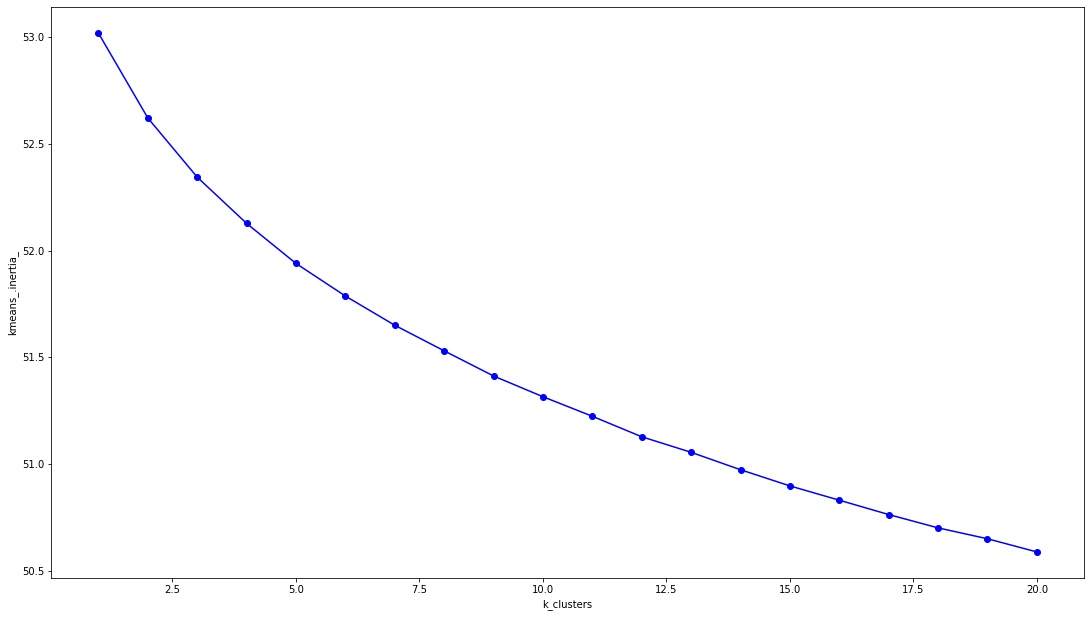

In [40]:
# Try using elbow method but still can not see the optimal number of clusterings

inertias = np.empty((20))
for k in range(1, 21):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 20), end="")
    kmeans_.fit(data)
    inertias[k-1] = kmeans_.inertia_
    
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)  
x = range(1, 21)
y = inertias
  
# plotting the points 
plt.plot(x, y, "bo-")
  
# naming the x axis
plt.xlabel('k_clusters')
# naming the y axis
plt.ylabel('kmeans_.inertia_')
plt.show()    

101/101

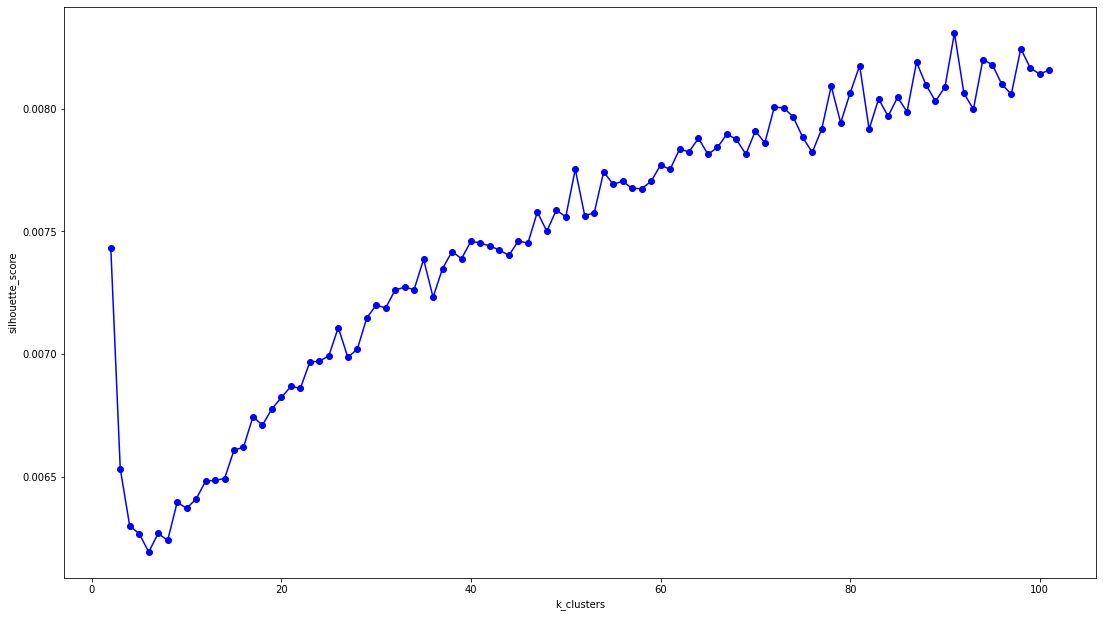

In [42]:
# Try using Silhouette score but still can not see the optimal number of clusterings

sil_scores = []
for k in range(2, 102):
    kmeans_ = KMeans(n_clusters= k, random_state=42)
    print("\r{}/{}".format(k, 101), end="")
    kmeans_.fit(data)
    sil_scores.append(silhouette_score(data, kmeans_.labels_))
    
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)  
x = range(2, len(sil_scores)+2)
y = sil_scores
  
# plotting the points 
plt.plot(x, y, "bo-")
  
# naming the x axis
plt.xlabel('k_clusters')
# naming the y axis
plt.ylabel('silhouette_score')
plt.show()    